# <font color='black'> Auto Insurance Fraud Detection</font>

## Table of Contents
    
4. [Splitting Data into Training and Test Sets](#d_ID)

    4.1 [Feature Scaling](#d1_ID)
    
    4.2 [Oversampling using SMOTE](#d2_ID)

5. [Dimensionality Reduction](#e_ID)

    5.1 [Recursive Feature Elimination (RFE)](#e1_ID)
    
    5.2 [Principal Component Analysis (PCA)](#e2_ID)

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## <a id='d_ID'> 4. Splitting Data into Training and Test Sets </a>

The data was prepared for training and evaluating the classification models using the data frame with the factorized categorical variables.  All the independent variables were separated ('X') from the target class variable, 'fraud_reported' ('y').  The 'X' and 'y' sets were then split into training and test sets in order to use the training set for dimensionality reduction and building classification models and use the test set to evaluate the models.

In [30]:
# Separate the independent variables and the target class variable
insurance_claims_fct_X = insurance_claims_fct.drop('fraud_reported', axis=1)
X = insurance_claims_fct_X
y = insurance_claims_fct['fraud_reported']
y.replace('N', 0, inplace=True)
y.replace('Y', 1, inplace=True)

In [31]:
print(len(X))
print(len(y))

1000
1000


In [32]:
X[0:5]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_year,policy_bind_month,policy_bind_day,incident_month,incident_day
0,328,48,3,2,1000,1406.91,0,466132,2,5,...,13020,52080,11,2,2004,2014,10,17,1,25
1,228,42,2,2,2000,1197.22,5000000,468176,2,5,...,780,3510,9,13,2007,2006,6,27,1,21
2,134,29,3,1,2000,1413.14,5000000,430632,1,7,...,3850,23100,5,31,2007,2000,9,6,2,22
3,256,41,1,2,2000,1415.74,6000000,608117,1,7,...,6340,50720,4,35,2014,1990,5,25,1,10
4,228,44,1,3,1000,1583.91,6000000,610706,2,1,...,650,4550,1,32,2009,2014,6,6,2,17


In [33]:
y[0:5]

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [34]:
# Splitting data into training and test sets
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 39)
(700,)
(300, 39)
(300,)


There are 39 independent variables and a 'fraud_reported' class variable, 700 records in the training set and 300 records in the test set.

### <a id='d1_ID'> 4.1 Feature Scaling </a>

The independent features were scaled to reduce the impact of large-valued features on the prediction models for the 'fraud_reported' class by scaling the features to have the same scale.

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
## Scaling independent variables
sc_X = StandardScaler()

In [39]:
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

In [40]:
print(X_train_sc[0:5])

[[ 0.77350548  1.06607944 -1.22267102 -1.19814909 -1.01266046 -0.46736553
  -0.49454026 -0.68942099  1.09286658 -0.96562008  0.58740782  0.20361501
  -1.39672043  0.32141759  0.0957192   1.68615426 -1.56955225 -0.2059438
  -0.10425505  1.29013019 -0.90692992 -1.12031252 -0.82429719  1.26802331
   0.02790558  1.3282034   1.31045515 -1.86138852 -1.43059645 -1.45920581
  -1.85483204  0.37537666 -0.62149875 -0.52991622 -1.35160082 -0.14673709
  -0.27642775 -0.95174376 -1.61859033]
 [-0.67064814 -0.99210848  1.20532817 -1.19814909 -0.19505686 -0.79323529
  -0.49454026 -0.31551996  1.09286658  0.56595255 -0.15036516  0.38067154
   0.36174054  0.64172682 -1.37723158  0.76187236 -0.62889594 -1.25821138
  -1.41918355  1.29013019  0.54029867 -0.54986788 -0.82429719  0.04877013
  -1.19296358  1.3282034   0.05040212  0.5793564   1.03006043 -0.26500563
   0.60996641 -1.37972413 -1.24021957 -1.3527675  -1.0790614  -1.29120468
  -0.50434227 -0.95174376 -0.57732421]
 [ 0.96375326  0.7411024  -0.008671

In [41]:
print(X_test_sc[0:5])

[[-0.70523864 -1.20875984  1.20532817  0.05364847 -0.19505686 -0.0877997
  -0.49454026 -0.80206523  1.09286658  0.56595255 -0.88813814 -1.03578071
  -1.39672043 -0.89931644 -0.17848166 -1.08669143  1.25241669  0.84632378
   0.55320921 -0.57962371 -0.42452039  1.16146603  1.13498306 -1.17048305
  -1.19296358 -0.45461996 -1.2096509   0.26271716 -0.29269669 -0.3086199
   0.5208773   1.62902008  0.79272027  1.11578633 -0.12517346  1.56996428
  -0.84621405  0.96268334  0.23254943]
 [-0.65335288 -0.99210848 -1.22267102  1.30544602  1.44015034 -0.25720815
  -0.49454026 -0.55460926  1.09286658  1.58700098 -0.88813814 -1.21283724
   0.36174054 -0.89931644 -0.48432108 -1.08669143  1.25241669  0.84632378
   0.55320921  0.35525324 -0.90692992  0.59102139  1.13498306  0.04877013
   1.24877474  1.3282034  -1.2096509  -0.16491686  0.29884687 -0.63468847
  -0.14516978  1.12756271  0.17399945 -0.03620546  1.37379331  0.4254967
   1.20501663  0.96268334 -1.5028941 ]
 [-0.09990479 -0.45048008 -1.22267102

### <a id='d2_ID'> 4.2 Oversampling using SMOTE </a>

Because the class attribute is unbalanced, SMOTE is applied in order to better predict Fraud Reported = 'Y' class. SMOTE from imblearn oversamples the minority 'Y' class.

In [42]:
print(X_train_sc.shape)
print(y_train.shape)

(700, 39)
(700,)


In [43]:
print(len(y_train[y_train==0]))
print(len(y_train[y_train==1]))

530
170


In [44]:
# Ratio of 'fraud_reported' as 'Yes' to 'No'
len(y_train[y_train==1])/ len(y_train[y_train==0])

0.32075471698113206

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
smote = SMOTE(random_state=1) # default k_neighbors = 5

In [47]:
X_train_sc_smote, y_train_smote = smote.fit_sample(X_train_sc, y_train)

In [48]:
# Number of records by class before SMOTE was applied
print(len(y_train[y_train==0]))
print(len(y_train[y_train==1]))

530
170


In [49]:
# Number of records by class after SMOTE was applied
print(len(y_train_smote[y_train_smote==0]))
print(len(y_train_smote[y_train_smote==1]))

530
530


## <a id='e_ID'> 5. Dimensionality Reduction </a>

### <a id='e1_ID'> 5.1 Recursive Feature Elimination (RFE) </a> 

For Feature Selection, Recursive Feature Elimination (RFE) was used.  First, the optimal number of features was found using the RFECV function with stratified 10-fold cross-validation using 'roc_auc' scores,  the logistic regression algorithm, and the X scaled and Y training sets (with SMOTE applied).  The logistic regression algorithm was chosen over support vector machine and random forest classification algorithms because of its efficiency.  The 'roc_auc' showed better results for number of selected features than 'accuracy' and 'f1' for the auto insurance claims dataset and was used.  The scaled X and y training sets with SMOTE applied also resulted in better number of selected features. 

In [50]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

In [51]:
# Find optimal number of features to select for dataset
logit = LogisticRegression(multi_class='ovr', solver='lbfgs')
rfecv = RFECV(estimator=logit, step=1, cv=StratifiedKFold(10), scoring='roc_auc')

In [52]:
rfecv.fit(X_train_sc_smote, y_train_smote)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring='roc_auc', step=1, verbose=0)

Optimal number of features : 13


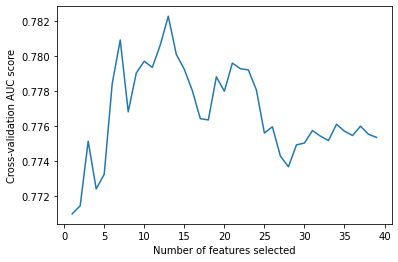

In [53]:
print(f"Optimal number of features : {rfecv.n_features_}")

# Plotting the number of features vs. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation AUC score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [54]:
rfecv.grid_scores_

array([0.77100392, 0.77146671, 0.7751513 , 0.77242791, 0.77326451,
       0.77842649, 0.78091848, 0.77682449, 0.77903168, 0.77970808,
       0.77935208, 0.78063368, 0.78227127, 0.78009968, 0.77924528,
       0.77803489, 0.77643289, 0.77636169, 0.77881808, 0.77799929,
       0.77960128, 0.77928088, 0.77920968, 0.77807049, 0.7756141 ,
       0.7759701 , 0.7742969 , 0.77369171, 0.7749377 , 0.7750445 ,
       0.7757565 , 0.7754361 , 0.7751869 , 0.7761125 , 0.7757209 ,
       0.7754717 , 0.7760057 , 0.7755429 , 0.7753649 ])

In [55]:
# Making a dataframe with selected features
X_train_rfe = rfecv.transform(X_train_sc_smote)

In [56]:
X_train_rfe.shape

(1060, 13)

In [57]:
rfecv.n_features_

13

In [58]:
rfecv.support_

array([ True,  True,  True, False, False, False,  True, False,  True,
       False, False,  True,  True, False, False,  True, False,  True,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False])

In [59]:
rfecv.ranking_

array([ 1,  1,  1,  3, 16, 19,  1,  6,  1, 26,  8,  1,  1, 15, 11,  1, 25,
        1, 23, 21,  1,  7,  1, 24,  9,  5, 27, 17,  1, 18,  1, 13, 12,  4,
       20,  2, 10, 22, 14])

In [60]:
X_train.columns[list(rfecv.support_)]

Index(['months_as_customer', 'age', 'policy_state', 'umbrella_limit',
       'insured_sex', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'incident_severity', 'incident_city',
       'number_of_vehicles_involved', 'injury_claim', 'vehicle_claim'],
      dtype='object')

In [61]:
# For test set with selected features
X_test_rfe = rfecv.transform(X_test_sc)

In [62]:
X_test_rfe.shape

(300, 13)

The cross-validation scores for the optimal number of features to choose was 13 with the highest AUC score of 0.7883. Therefore, the 13 of 39 selected features were: 'months_as_customer', 'age', 'policy_state', 'umbrella_limit', 'insured_sex', 'insured_hobbies', 'insured_relationship', 'incident_type', 'incident_severity', 'incident_city', 'number_of_vehicles_involved', 'injury_claim', and 'vehicle_claim'.

### <a id='e2_ID'> 5.2 Principal Component Analysis (PCA) </a> 

For Feature Extraction, Principal Component Analysis (PCA) is a linear diminsionality reduction method using singular value decompostion to reduce the feature dimensional space. 

In [63]:
from sklearn import decomposition

#### Using 10 number of principal components

In [64]:
np.random.seed(5)

In [65]:
pca = decomposition.PCA(n_components=10)

In [66]:
pca.fit(X_train_sc_smote)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [67]:
# For training set
X_train_pca = pca.transform(X_train_sc_smote)

In [68]:
X_train_pca

array([[ 3.96334429,  1.49334204,  0.62101244, ...,  1.54193602,
         1.62799863, -0.24855763],
       [-0.38520305, -0.27075275,  1.90716189, ..., -0.0748823 ,
         1.75056054,  0.537088  ],
       [-3.15485298,  1.12879752,  2.12115797, ...,  1.04169216,
         0.87298751,  0.0293925 ],
       ...,
       [-0.51865927, -0.00735998,  1.9005417 , ...,  0.79047182,
        -0.60650365,  0.21314315],
       [-1.35747555,  1.24071643, -0.91722683, ...,  1.21227916,
         1.15988093, -1.63369523],
       [ 2.77247295,  3.05343554, -0.63048587, ..., -0.23652585,
         0.02805231,  0.52169372]])

In [69]:
X_train_pca.shape

(1060, 10)

In [70]:
# Variance explained by the principal components
pca.explained_variance_ratio_

array([0.10123595, 0.05665047, 0.0482321 , 0.04131329, 0.03689522,
       0.03546767, 0.03469894, 0.03370446, 0.03247234, 0.03135181])

In [71]:
# Culmulative Variance Explained
var_Data = pca.explained_variance_ratio_
cum_var_Data = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
cum_var_Data

array([10.12, 15.79, 20.61, 24.74, 28.43, 31.98, 35.45, 38.82, 42.07,
       45.21])

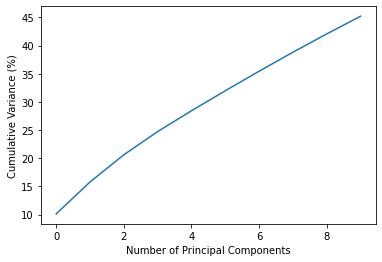

In [72]:
plt.plot(cum_var_Data)
plt.ylabel('Cumulative Variance (%)')
plt.xlabel('Number of Principal Components')
plt.show()

Because 10 prinicipal components captured less than 50% of the variance, finding 20 principal components was tried. 

#### Using 20 number of principal components

In [73]:
np.random.seed(5)

In [74]:
pca = decomposition.PCA(n_components=20)

In [75]:
pca.fit(X_train_sc_smote)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [76]:
# For training set
X_train_pca = pca.transform(X_train_sc_smote)

In [77]:
X_train_pca

array([[ 3.96360930e+00,  1.50633036e+00, -6.40901615e-01, ...,
         3.18554585e-01,  2.72813056e-01, -1.20194515e+00],
       [-3.85475955e-01, -2.74018625e-01, -1.90729578e+00, ...,
         5.42171292e-01,  5.50985463e-01, -2.62042609e-01],
       [-3.15492540e+00,  1.13852590e+00, -2.11412371e+00, ...,
         6.25507805e-01,  1.15523945e-02,  3.10708160e-01],
       ...,
       [-5.18652006e-01, -1.80037984e-04, -1.91696308e+00, ...,
         6.38909751e-01, -6.99876461e-01,  8.17613044e-01],
       [-1.35757426e+00,  1.23322383e+00,  9.09582579e-01, ...,
        -5.76040383e-01,  4.51375268e-01, -5.22513970e-01],
       [ 2.77254305e+00,  3.06953842e+00,  6.02765034e-01, ...,
         4.81002376e-02,  1.59826034e-01,  2.45112293e-01]])

In [78]:
X_train_pca.shape

(1060, 20)

In [79]:
# Variance exaplined by principal components
pca.explained_variance_ratio_

array([0.10123598, 0.05666011, 0.0482577 , 0.04148055, 0.03697361,
       0.03557651, 0.03475719, 0.03393259, 0.03266321, 0.03179389,
       0.03042973, 0.02920761, 0.0274625 , 0.02702267, 0.02675519,
       0.0259636 , 0.02505035, 0.02477336, 0.02365712, 0.02345044])

In [80]:
# Culmulative Variance Explained
var_Data = pca.explained_variance_ratio_
cum_var_Data = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
cum_var_Data

array([10.12, 15.79, 20.62, 24.77, 28.47, 32.03, 35.51, 38.9 , 42.17,
       45.35, 48.39, 51.31, 54.06, 56.76, 59.44, 62.04, 64.55, 67.03,
       69.4 , 71.75])

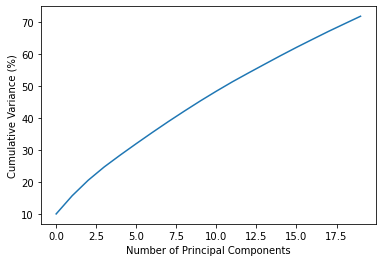

In [81]:
plt.plot(cum_var_Data)
plt.ylabel('Cumulative Variance (%)')
plt.xlabel('Number of Principal Components')
plt.show()

In [82]:
print("The dimension of the dataset before applying PCA was:", X_train_sc_smote.shape)

The dimension of the dataset before applying PCA was: (1060, 39)


In [83]:
print("The dimension of the dataset after applying PCA is:", X_train_pca.shape)

The dimension of the dataset after applying PCA is: (1060, 20)


In [84]:
# For test set
X_test_pca = pca.transform(X_test_sc)

In [85]:
X_test_pca.shape

(300, 20)

20 principal components captured 71.75% of the variance of the features in the training data and was selected to use in training the classification models to predict 'fraud_reported' class attribute.